<a href="https://colab.research.google.com/github/Bhavya-Agrawal/Py_Projects/blob/master/Hand_Gesture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset from Kaggle + Unzip the folders

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1).json': b'{"username":"bhavyaagrawal","key":"36ad1e7259b5f3cdabb7691ddaffb0fa"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

indian-sign-language-isl.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile
isl = "/content/indian-sign-language-isl.zip"
with ZipFile(isl,'r') as zip:
  zip.extractall();
  print("Dataset uploaded successfully !!!")

Dataset uploaded successfully !!!


# **Collecting the dataset**


### **Fetching all images**

In [8]:
from glob import glob

In [9]:
images = glob('/content/Indian/*/*.jpg', recursive=True)

In [10]:
images[42000]

'/content/Indian/4/537.jpg'

### **Fetching Images and corresponsing Labels**

In [49]:
unique_labels = []

total_images = []
folder_labels = []
images = glob('/content/Indian/*/*.jpg', recursive=True)

for image in images:
  total_images.append(image)

  label = image.split('/')[-2]
  folder_labels.append(label)

  if label not in unique_labels:
    unique_labels.append(label)

In [94]:
numerical_folder_labels=[]
for label in folder_labels:
  # print(type(label))
  # print(label)
  numerical_folder_labels.append(unique_labels.index(label))



print(numerical_folder_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [51]:
print(len(folder_labels))
print(len(total_images))
print(unique_labels)
print(len(unique_labels))

42745
42745
['N', 'M', '5', 'E', 'O', '6', 'S', 'Q', 'Z', 'B', 'L', '3', 'R', 'I', 'Y', '1', 'A', '2', 'T', 'D', '7', '9', 'H', 'U', 'J', '8', 'V', 'K', 'P', 'G', 'X', 'W', 'C', 'F', '4']
35


# Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [97]:
training_images, test_images, training_labels, test_labels = train_test_split(total_images, numerical_folder_labels, test_size=0.25, random_state=42)

In [98]:
len(training_images), len(training_labels), len(test_images), len(test_labels)

(32058, 32058, 10687, 10687)

In [99]:
import cv2

In [100]:
train_images = []
test_image = []
for image in training_images:
  train_images.append(cv2.resize(cv2.imread(image), (50,50)))

for image in test_images:
  test_image.append(cv2.resize(cv2.imread(image),(50,50)))


In [101]:
import numpy as np


In [102]:
train_images = np.array(train_images, dtype = 'float')/255.0
test_image = np.array(test_image, dtype = 'float')/255.0

In [116]:
print(train_images)

240435000


In [103]:
import keras.utils
import tensorflow as tf

In [120]:
data_train = tf.keras.utils.to_categorical(training_labels, num_classes = 35)
data_test = tf.keras.utils.to_categorical(test_labels, num_classes = 35)

In [121]:
print(data_train.shape)
print(data_test.shape)

(32058, 35)
(10687, 35)


## Data Augmentation

In [106]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# training_data_generator = ImageDataGenerator(rotation_range=20,
#                                              width_shift_range=0.2,
#                                              height_shift_range=0.2,
#                                              horizontal_flip=True,
#                                              validation_split=0.2)

In [24]:
type(training_images)
print(training_images)

['/content/Indian/G/636.jpg', '/content/Indian/O/787.jpg', '/content/Indian/I/84.jpg', '/content/Indian/6/354.jpg', '/content/Indian/B/139.jpg', '/content/Indian/L/423.jpg', '/content/Indian/A/446.jpg', '/content/Indian/6/977.jpg', '/content/Indian/D/893.jpg', '/content/Indian/A/90.jpg', '/content/Indian/5/125.jpg', '/content/Indian/Q/1109.jpg', '/content/Indian/9/23.jpg', '/content/Indian/K/428.jpg', '/content/Indian/R/564.jpg', '/content/Indian/M/885.jpg', '/content/Indian/H/1154.jpg', '/content/Indian/P/267.jpg', '/content/Indian/J/812.jpg', '/content/Indian/9/1135.jpg', '/content/Indian/K/11.jpg', '/content/Indian/D/757.jpg', '/content/Indian/3/223.jpg', '/content/Indian/R/168.jpg', '/content/Indian/I/057.jpg', '/content/Indian/C/1104.jpg', '/content/Indian/R/150.jpg', '/content/Indian/G/170.jpg', '/content/Indian/1/710.jpg', '/content/Indian/9/355.jpg', '/content/Indian/Q/1151.jpg', '/content/Indian/T/652.jpg', '/content/Indian/C/1132.jpg', '/content/Indian/V/136.jpg', '/content/I

In [25]:
cv2.imread

<function imread>

In [107]:
import cv2

In [34]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

32058
G


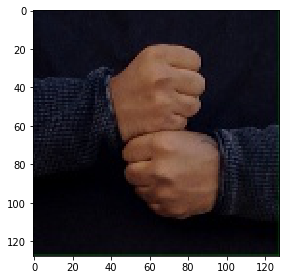

O


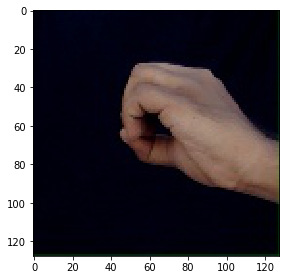

I


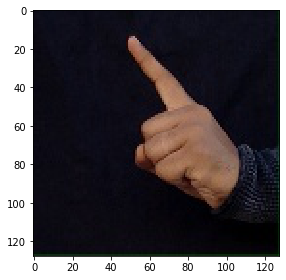

6


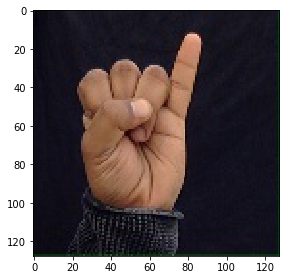

B


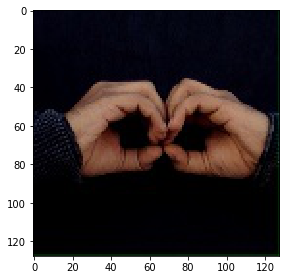

In [35]:
# train_images,train_labels = train_generator.next()

print(len(training_images))
for i in range(0,5):
    image = training_images[i]
    print(training_labels[i])
    imshow(image)

In [108]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from time import time

In [109]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=( 50, 50, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(215, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(190, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [110]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 150)       4200      
                                                                 
 activation_18 (Activation)  (None, 48, 48, 150)       0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 150)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 200)       270200    
                                                                 
 activation_19 (Activation)  (None, 22, 22, 200)       0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 200)      0         
 g2D)                                                 

In [111]:
start_time = time()
# history = model.fit(train_images,
#                     steps_per_epoch=3,
#                     epochs=2,
#                     validation_steps=10,
#                     verbose=1)
print(type(training_labels))
history = model.fit(train_images, data_train, epochs=2, batch_size=64)
print('time taken ',time()-start_time)

<class 'list'>
Epoch 1/2


ValueError: ignored

In [ ]:
h = model.fit_generator(training_data_generator,
                        steps_per_epoch = 2,
                        epochs = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored